## Encoders 
#### with startup data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
#load dataset
df = pd.read_csv("startup.csv")


In [3]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


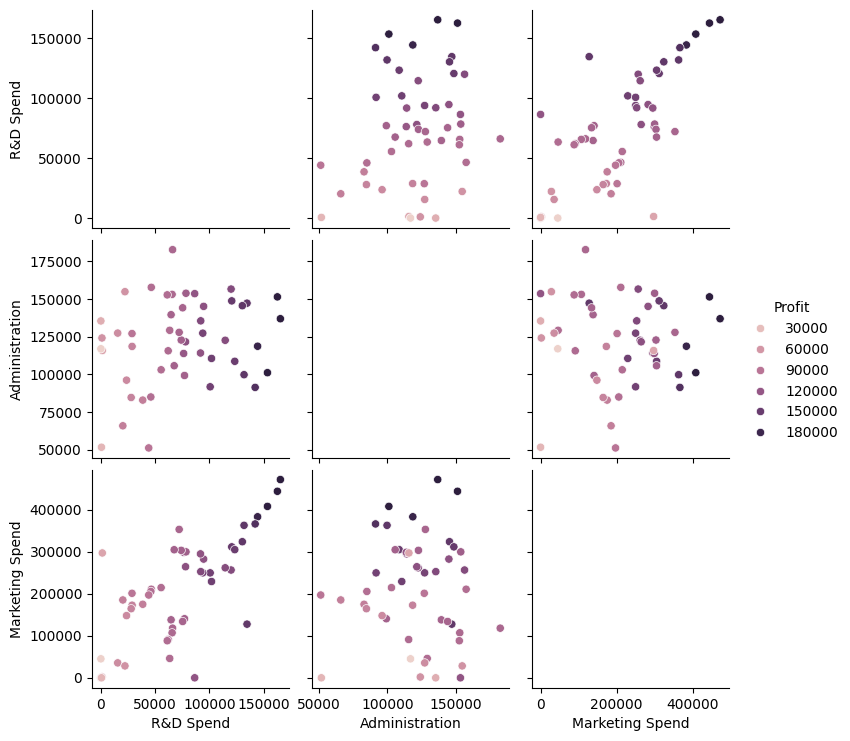

In [5]:
# visualization
sns.pairplot(df,hue="Profit")

## Encoding change categorical data into numerical form


In [6]:
# check the data's category
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
# seprate the categorical column from dataset
x =df.iloc[:,3:4] #.values.reshape(-1,1) #slicing and reshape into array


In [8]:
# import 
# from sklearn.preprocessing import OneHotEncoding
from sklearn.preprocessing import LabelEncoder

In [9]:
# 
le = LabelEncoder()

In [10]:
df["State"]= le.fit_transform(df["State"])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
# seprate input & output
x = df.iloc[:,0:4]
y =df.iloc[:,-1]

In [16]:
# #seprate training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =25 )

In [18]:
# assign a virable for LinearRegression
model  =LinearRegression()

In [19]:
# train the model
model.fit(x_train,y_train)

LinearRegression()

In [23]:
# prediction
y_pred = model.predict(x_test)

In [25]:
# check the accuracy
r2_score(y_test,y_pred)

0.867997857828813

In [33]:
# check the model by adding data
# Multiple Linear Regression
# y =b0 +  b1x1 + b2x2 + b3x3.......bnxn
# b = coef_
# b0 = intercept_
b = model.coef_
b0=model.intercept_
print(b)
df.head(2)

[ 8.46440283e-01 -2.92537491e-02  2.57169859e-02 -5.03472828e+02]


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


In [34]:
y = b0 + (b[0]*162597.7) + (b[1]*151377.59 ) + (b[2]*443898.53 ) + (b[3]*0) 

In [35]:
y

192485.83157387548

In [39]:
y = b0 + (b[0]*165349.2) + (b[1]*136897.80) + (b[2]*443898.53 ) + (b[3]*0) 

In [40]:
y

195238.40015771013

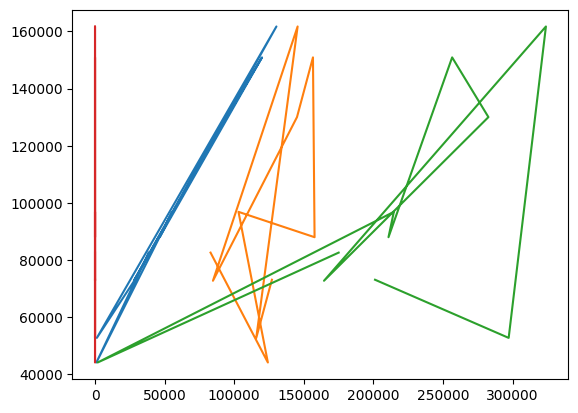